In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import pickle
import time

import Dense
import mse
import ReLU
import Sigmoid
import Softmax
import LogLoss
import Tanh

In [2]:
with open('data_train.pickle', 'rb') as d:
    LOADED_DATA = pickle.load(d)

In [3]:
#data preparation

class One_Hot_Encoder:
    def __init__(self, dims):
        self.mat = -np.ones((dims, dims))
        for i in range(dims):
            self.mat[i][i]=1
        
    def __call__(self, data):
        return self.mat[int(data)]
    
    
def transform_from_pickle(data):
    encoder = One_Hot_Encoder(10)
    target_after_encoding = [encoder(int(i)) for i in data['target']]
    target = np.array(target_after_encoding)
    return data['data'], target

def train_test_split(data, target, validation_size=0.25, shuffle=True):
    assert len(data) == len(target)
    if shuffle:
        p = np.random.permutation(len(data))
        data = data[p]
        target = target[p]
    partition = int(len(data)*validation_size)
    return (data[:partition], data[partition:],
            target[:partition], target[partition:])

def standartize(data, epsilon=0.0001):
    return (data - np.mean(data, axis=0)) /(np.std(data, axis=0) + epsilon)

8.0

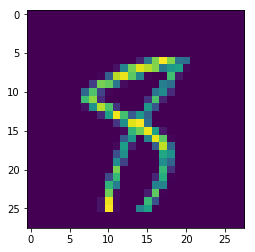

In [4]:
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28))
LOADED_DATA['target'][15]

In [25]:
class net3:
    def __init__(self):
        self.d1 = Dense.Dense(28*28, 16, 0.0001)
        self.a1 = Tanh.Tanh()
        self.d2 = Dense.Dense(16, 16, 0.0001)
        self.a2 = Tanh.Tanh()
        self.d3 = Dense.Dense(16, 10, 0.0001)
        self.a3 = Tanh.Tanh()
        self.loss_ = mse.mse()
    
    def loss(self, x, y):
        return self.loss_.forward(x, y)
    
    def forward(self, x, label=None):
        x = self.d1.forward(x)
        x = self.a1.forward(x)
        x = self.d2.forward(x)
        x = self.a2.forward(x)
        x = self.d3.forward(x)
        x = self.a3.forward(x)
        if label is None:
            return x
        return self.loss_.forward(x, label)
    
    def backward(self):
        loss = self.loss_.backward()
        loss = self.a3.backward(loss)
        loss = self.d3.backward(loss)
        loss = self.a2.backward(loss)
        loss = self.d2.backward(loss)
        loss = self.a1.backward(loss)
        loss = self.d1.backward(loss)

In [26]:
n = net3()
train_losses = []
valid_losses = []

In [27]:
TRANSFORMED_DATA, TARGET = transform_from_pickle(LOADED_DATA)
DATA = standartize(TRANSFORMED_DATA)

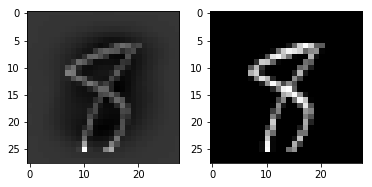

In [28]:
pyplot.subplot(1, 2, 1)
pyplot.imshow(DATA[15].reshape(28,28), cmap='gray')
pyplot.subplot(1, 2, 2)
pyplot.imshow(LOADED_DATA['data'][15].reshape(28,28), cmap='gray')

In [29]:
train_data, valid_data, train_target, valid_target = train_test_split(DATA, TARGET)

In [34]:
t1 = time.time()
epochs = 60
for epoch in range(epochs):
    t_start_epoch = time.time()
    loss = 0
    for index, (data, target) in enumerate(zip(train_data, train_target)):
        t_start_thousand = time.time()
        loss += n.forward(data, target)
        n.backward()
    train_losses.append(loss / train_data.shape[0])
    loss = 0
    for data, target in zip(valid_data, valid_target):
        loss += n.forward(data, target)
    valid_losses.append(loss / train_data.shape[0])
    t_end_epoch = time.time()
    print('epoch #', epoch, 'time', t_end_epoch - t_start_epoch, 'loss =', loss / train_data.shape[0])
t2 = time.time()
print(t2 - t1)

epoch # 0 time 6.563375234603882 loss = 0.15640598279173643
epoch # 1 time 15.369879007339478 loss = 0.15614979182340755
epoch # 2 time 9.576547622680664 loss = 0.15590639292981415
epoch # 3 time 6.700383424758911 loss = 0.15567482630835222
epoch # 4 time 6.67138147354126 loss = 0.15545422733491127
epoch # 5 time 5.898337364196777 loss = 0.15524381490603542
epoch # 6 time 6.192353963851929 loss = 0.15504288146881648
epoch # 7 time 6.440368413925171 loss = 0.15485078445899478
epoch # 8 time 6.0313451290130615 loss = 0.15466693891934655
epoch # 9 time 5.896337509155273 loss = 0.15449081111176294
epoch # 10 time 5.898337364196777 loss = 0.15432191296940226
epoch # 11 time 5.869335651397705 loss = 0.1541597972619586
epoch # 12 time 5.819332838058472 loss = 0.15400405336862338
epoch # 13 time 5.837333679199219 loss = 0.15385430357080418
epoch # 14 time 5.855334997177124 loss = 0.1537101997910069
epoch # 15 time 5.826333045959473 loss = 0.15357142071596327
epoch # 16 time 5.839333772659302 l

36284 0.9214984126984127


Text(0.5, 1.0, '5 [[-0.99260186 -0.9912445  -0.99999889 -0.9670857  -0.9794295   0.90026253\n  -0.99709283 -0.99731258 -0.93527022 -0.98308015]]')

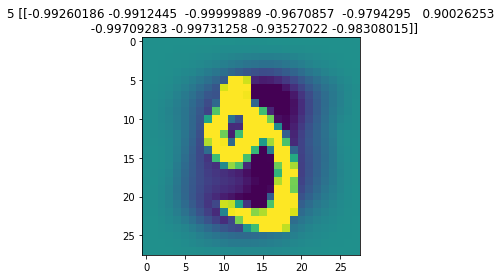

In [35]:
right_answers = 0
for data, target in zip(valid_data, valid_target):
        answer = n.forward(data)
        if np.argmax(answer) == np.argmax(target):
            right_answers += 1
        else:
            wrong_data = data
print(right_answers, right_answers/valid_target.shape[0])
pyplot.imshow(wrong_data.reshape(28, 28), vmin=-1, vmax=1)
pyplot.title(str(np.argmax(n.forward(wrong_data))) + ' ' + str(n.forward(wrong_data)))

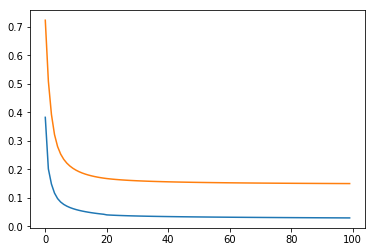

In [36]:
start = 0
pyplot.plot(train_losses[start:])
pyplot.plot(valid_losses[start:])

[[-0.98522334 -0.99788274  0.99818992 -0.98827206 -0.99919981 -0.99999077
  -0.98262322 -0.9887689  -0.99020313 -0.99968111]]
(1, 10)


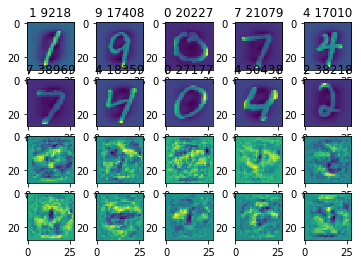

In [37]:
for i in range(0):
    number = np.random.randint(len(DATA))
    pyplot.subplot(4, 5, i+1)
    pyplot.imshow(DATA[number].reshape(28, 28))
    pyplot.title(str(np.argmax(n.forward(DATA[number]))) + ' ' + str(number))
print(n.forward(DATA[number]))
print(n.forward(DATA[number]).shape)
for i in range(10):
    pyplot.subplot(4, 5, i+11)
    pyplot.imshow(np.transpose(n.d1.mt, (1, 0))[i].reshape(28, 28))

[[ 0.93443194 -0.99981826 -0.99698023 -0.99944547 -0.99257476 -0.99853864
  -0.9785433  -0.91531123 -0.99316846 -0.99146711]]
0


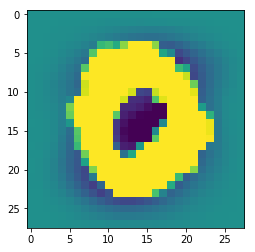

In [13]:
pyplot.imshow(DATA[number].reshape(28, 28), vmin=-1, vmax=1)
answer = n.forward(DATA[number])
print(answer)
print(np.argmax(answer))
